In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sin Portfolio

## Finding active stocks in each month

In [2]:
sin_pivot = pd.read_csv("sin_pivot.csv")
# sin_stocks = pd.read_csv("sin_stocks.csv")

In [3]:
sin_pivot["datadate"] = pd.to_datetime(sin_pivot["datadate"])
sin_pivot.set_index("datadate",inplace=True)

In [4]:
sin_pivot.head()

,2788A,3157B,3ALES.,3BACDA,3BBTCE,3BETM,3BOBR,3BRAUE,3CGMI,3CGMI.,...,WBEV,WBR.,WDKA,WFSN.1,WIKD,WIMHY,WNWN,WVVI,WYNMY,WYNN
datadate,,,,,,,,,,,,,,,,,,,,,
1962-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-03-31,-0.048544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-04-30,-0.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-05-31,-0.057693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-06-30,-0.065088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
len(sin_pivot.columns)

348

In [6]:
sin_portfolio = sin_pivot.copy()
sin_portfolio["Num_Active_Stocks"] = len(sin_pivot.columns) - sin_portfolio.isnull().sum(axis = 1)
sin_portfolio["Portfolio_Proportion"] = 1/sin_portfolio["Num_Active_Stocks"]

sin_portfolio

,2788A,3157B,3ALES.,3BACDA,3BBTCE,3BETM,3BOBR,3BRAUE,3CGMI,3CGMI.,...,WDKA,WFSN.1,WIKD,WIMHY,WNWN,WVVI,WYNMY,WYNN,Num_Active_Stocks,Portfolio_Proportion
datadate,,,,,,,,,,,,,,,,,,,,,
1962-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,0.100000
1962-03-31,-0.048544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,0.076923
1962-04-30,-0.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,0.076923
1962-05-31,-0.057693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,0.076923
1962-06-30,-0.065088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,0.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.025392,-0.148022,-0.116127,109,0.009174
2022-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.328664,-0.065172,-0.062145,106,0.009434
2022-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.006421,0.163412,-0.137973,106,0.009434


## Multiplying each row by its respective portfolio proportions

In [7]:
sin_portfolio_returns = sin_portfolio.mul(sin_portfolio["Portfolio_Proportion"], axis = 0)
sin_portfolio_returns.drop(columns = ["Num_Active_Stocks", "Portfolio_Proportion"], inplace = True)
sin_portfolio_returns

,2788A,3157B,3ALES.,3BACDA,3BBTCE,3BETM,3BOBR,3BRAUE,3CGMI,3CGMI.,...,WBEV,WBR.,WDKA,WFSN.1,WIKD,WIMHY,WNWN,WVVI,WYNMY,WYNN
datadate,,,,,,,,,,,,,,,,,,,,,
1962-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-03-31,-0.003734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-04-30,-0.005495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-05-31,-0.004438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-06-30,-0.005007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000666,-0.000651,NaN,NaN,NaN,NaN,NaN,0.000233,-0.001358,-0.001065
2022-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.002535,-0.000529,NaN,NaN,NaN,NaN,NaN,-0.003101,-0.000615,-0.000586
2022-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.002633,-0.000158,NaN,NaN,NaN,NaN,NaN,0.000061,0.001542,-0.001302


In [8]:
sin_portfolio_returns["Portfolio_Returns"] = sin_portfolio_returns.sum(axis = 1)
sin_portfolio_returns["Portfolio_Proportion"] = sin_portfolio["Portfolio_Proportion"]
sin_portfolio_merged = pd.concat([sin_portfolio[["Num_Active_Stocks"]], sin_portfolio_returns], axis = 1, join = "inner")

sin_portfolio_merged

,Num_Active_Stocks,2788A,3157B,3ALES.,3BACDA,3BBTCE,3BETM,3BOBR,3BRAUE,3CGMI,...,WDKA,WFSN.1,WIKD,WIMHY,WNWN,WVVI,WYNMY,WYNN,Portfolio_Returns,Portfolio_Proportion
datadate,,,,,,,,,,,,,,,,,,,,,
1962-02-28,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016444,0.100000
1962-03-31,13,-0.003734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011945,0.076923
1962-04-30,13,-0.005495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.073594,0.076923
1962-05-31,13,-0.004438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.138066,0.076923
1962-06-30,13,-0.005007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.052827,0.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000233,-0.001358,-0.001065,-0.067297,0.009174
2022-05-31,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.003101,-0.000615,-0.000586,-0.077684,0.009434
2022-06-30,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000061,0.001542,-0.001302,-0.050698,0.009434


In [9]:
moved_cols = ["Portfolio_Returns", "Portfolio_Proportion"]

sin_portfolio_merged = sin_portfolio_merged[moved_cols + [col for col in sin_portfolio_merged.columns if col not in moved_cols]]
sin_portfolio_merged.head()

,Portfolio_Returns,Portfolio_Proportion,Num_Active_Stocks,2788A,3157B,3ALES.,3BACDA,3BBTCE,3BETM,3BOBR,...,WBEV,WBR.,WDKA,WFSN.1,WIKD,WIMHY,WNWN,WVVI,WYNMY,WYNN
datadate,,,,,,,,,,,,,,,,,,,,,
1962-02-28,0.016444,0.100000,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-03-31,-0.011945,0.076923,13,-0.003734,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-04-30,-0.073594,0.076923,13,-0.005495,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-05-31,-0.138066,0.076923,13,-0.004438,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-06-30,-0.052827,0.076923,13,-0.005007,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
sin_portfolio_merged.describe()["Portfolio_Returns"]

count    727.000000
mean       0.012576
std        0.051249
min       -0.257608
25%       -0.017051
50%        0.012665
75%        0.040887
max        0.317427
Name: Portfolio_Returns, dtype: float64

# Cleaning Fama

In [11]:
fama_df = pd.read_csv("Fama-French.csv")

In [12]:
fama_df["dateff"] = pd.to_datetime(fama_df["dateff"])
fama_df

C:\Users\user\AppData\Local\Temp\ipykernel_17492\1064673997.py:1: UserWarning: Parsing '31/01/1962' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  fama_df["dateff"] = pd.to_datetime(fama_df["dateff"])
C:\Users\user\AppData\Local\Temp\ipykernel_17492\1064673997.py:1: UserWarning: Parsing '28/02/1962' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  fama_df["dateff"] = pd.to_datetime(fama_df["dateff"])
C:\Users\user\AppData\Local\Temp\ipykernel_17492\1064673997.py:1: UserWarning: Parsing '30/03/1962' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  fama_df["dateff"] = pd.to_datetime(fama_df["dateff"])
C:\Users\user\AppData\Local\Temp\ipykernel_17492\1064673997.py:1: UserWarning: Parsing '30/04/1962' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  fama_df["dateff"] = pd.to_datetime

,dateff,mktrf,smb,hml,rf,umd
0,1962-01-31,-0.0387,0.0177,0.0513,0.0024,-0.0203
1,1962-02-28,0.0181,-0.0115,0.0082,0.0020,-0.0101
2,1962-03-30,-0.0068,0.0052,-0.0138,0.0020,0.0184
3,1962-04-30,-0.0659,-0.0070,0.0003,0.0022,0.0291
4,1962-05-31,-0.0865,-0.0334,0.0277,0.0024,0.0041
...,...,...,...,...,...,...
722,2022-03-31,0.0305,-0.0160,-0.0180,0.0001,0.0300
723,2022-04-29,-0.0946,-0.0141,0.0619,0.0001,0.0489
724,2022-05-31,-0.0034,-0.0185,0.0841,0.0003,0.0248
725,2022-06-30,-0.0843,0.0209,-0.0597,0.0006,0.0079


In [13]:
fama_df.set_index("dateff", inplace=True)

In [14]:
from pandas.tseries.offsets import MonthEnd

sin_pivot.index = sin_pivot.index + MonthEnd(0)
sin_pivot

,2788A,3157B,3ALES.,3BACDA,3BBTCE,3BETM,3BOBR,3BRAUE,3CGMI,3CGMI.,...,WBEV,WBR.,WDKA,WFSN.1,WIKD,WIMHY,WNWN,WVVI,WYNMY,WYNN
datadate,,,,,,,,,,,,,,,,,,,,,
1962-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-03-31,-0.048544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-04-30,-0.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-05-31,-0.057693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-06-30,-0.065088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.072555,-0.070981,NaN,NaN,NaN,NaN,NaN,0.025392,-0.148022,-0.116127
2022-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.268707,-0.056090,NaN,NaN,NaN,NaN,NaN,-0.328664,-0.065172,-0.062145
2022-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.279070,-0.016787,NaN,NaN,NaN,NaN,NaN,0.006421,0.163412,-0.137973


# Sin Regression

In [15]:
sin_returns = sin_portfolio_merged[["Portfolio_Returns"]]
sin_returns

,Portfolio_Returns
datadate,
1962-02-28,0.016444
1962-03-31,-0.011945
1962-04-30,-0.073594
1962-05-31,-0.138066
1962-06-30,-0.052827
...,...
2022-04-30,-0.067297
2022-05-31,-0.077684
2022-06-30,-0.050698


In [16]:
fama_df.index = fama_df.index + MonthEnd(0)
fama_df

,mktrf,smb,hml,rf,umd
dateff,,,,,
1962-01-31,-0.0387,0.0177,0.0513,0.0024,-0.0203
1962-02-28,0.0181,-0.0115,0.0082,0.0020,-0.0101
1962-03-31,-0.0068,0.0052,-0.0138,0.0020,0.0184
1962-04-30,-0.0659,-0.0070,0.0003,0.0022,0.0291
1962-05-31,-0.0865,-0.0334,0.0277,0.0024,0.0041
...,...,...,...,...,...
2022-03-31,0.0305,-0.0160,-0.0180,0.0001,0.0300
2022-04-30,-0.0946,-0.0141,0.0619,0.0001,0.0489
2022-05-31,-0.0034,-0.0185,0.0841,0.0003,0.0248


In [17]:
sin_model_df = pd.concat([sin_returns, fama_df], axis = 1, join = "inner")
sin_model_df

,Portfolio_Returns,mktrf,smb,hml,rf,umd
1962-02-28,0.016444,0.0181,-0.0115,0.0082,0.0020,-0.0101
1962-03-31,-0.011945,-0.0068,0.0052,-0.0138,0.0020,0.0184
1962-04-30,-0.073594,-0.0659,-0.0070,0.0003,0.0022,0.0291
1962-05-31,-0.138066,-0.0865,-0.0334,0.0277,0.0024,0.0041
1962-06-30,-0.052827,-0.0847,-0.0059,0.0255,0.0020,0.0646
...,...,...,...,...,...,...
2022-03-31,-0.029963,0.0305,-0.0160,-0.0180,0.0001,0.0300
2022-04-30,-0.067297,-0.0946,-0.0141,0.0619,0.0001,0.0489
2022-05-31,-0.077684,-0.0034,-0.0185,0.0841,0.0003,0.0248
2022-06-30,-0.050698,-0.0843,0.0209,-0.0597,0.0006,0.0079


In [18]:
sin_model_df["Portfolio_Excess_Returns"] = sin_model_df["Portfolio_Returns"] - sin_model_df["rf"]
sin_model_df

,Portfolio_Returns,mktrf,smb,hml,rf,umd,Portfolio_Excess_Returns
1962-02-28,0.016444,0.0181,-0.0115,0.0082,0.0020,-0.0101,0.014444
1962-03-31,-0.011945,-0.0068,0.0052,-0.0138,0.0020,0.0184,-0.013945
1962-04-30,-0.073594,-0.0659,-0.0070,0.0003,0.0022,0.0291,-0.075794
1962-05-31,-0.138066,-0.0865,-0.0334,0.0277,0.0024,0.0041,-0.140466
1962-06-30,-0.052827,-0.0847,-0.0059,0.0255,0.0020,0.0646,-0.054827
...,...,...,...,...,...,...,...
2022-03-31,-0.029963,0.0305,-0.0160,-0.0180,0.0001,0.0300,-0.030063
2022-04-30,-0.067297,-0.0946,-0.0141,0.0619,0.0001,0.0489,-0.067397
2022-05-31,-0.077684,-0.0034,-0.0185,0.0841,0.0003,0.0248,-0.077984
2022-06-30,-0.050698,-0.0843,0.0209,-0.0597,0.0006,0.0079,-0.051298


In [19]:
sin_model_df.rename(columns = {"mktrf": "ExRm", "smb": "SMB", "hml": "HML", "umd": "MOM"}, inplace=True)

In [20]:
sin_model_df

,Portfolio_Returns,ExRm,SMB,HML,rf,MOM,Portfolio_Excess_Returns
1962-02-28,0.016444,0.0181,-0.0115,0.0082,0.0020,-0.0101,0.014444
1962-03-31,-0.011945,-0.0068,0.0052,-0.0138,0.0020,0.0184,-0.013945
1962-04-30,-0.073594,-0.0659,-0.0070,0.0003,0.0022,0.0291,-0.075794
1962-05-31,-0.138066,-0.0865,-0.0334,0.0277,0.0024,0.0041,-0.140466
1962-06-30,-0.052827,-0.0847,-0.0059,0.0255,0.0020,0.0646,-0.054827
...,...,...,...,...,...,...,...
2022-03-31,-0.029963,0.0305,-0.0160,-0.0180,0.0001,0.0300,-0.030063
2022-04-30,-0.067297,-0.0946,-0.0141,0.0619,0.0001,0.0489,-0.067397
2022-05-31,-0.077684,-0.0034,-0.0185,0.0841,0.0003,0.0248,-0.077984
2022-06-30,-0.050698,-0.0843,0.0209,-0.0597,0.0006,0.0079,-0.051298


## Including Recession Indicator

In [21]:
recession = pd.read_csv("USREC.csv")

In [22]:
recession["DATE"] = pd.to_datetime(recession["DATE"])
recession["DATE"] = recession["DATE"] + MonthEnd(0)
recession

,DATE,USREC
0,1854-12-31,1
1,1855-01-31,0
2,1855-02-28,0
3,1855-03-31,0
4,1855-04-30,0
...,...,...
2008,2022-04-30,0
2009,2022-05-31,0
2010,2022-06-30,0
2011,2022-07-31,0


In [23]:
recession.set_index("DATE", inplace=True)

In [24]:
sin_model_df2 = pd.concat([sin_model_df, recession], axis = 1, join = "inner")
sin_model_df2

,Portfolio_Returns,ExRm,SMB,HML,rf,MOM,Portfolio_Excess_Returns,USREC
1962-02-28,0.016444,0.0181,-0.0115,0.0082,0.0020,-0.0101,0.014444,0
1962-03-31,-0.011945,-0.0068,0.0052,-0.0138,0.0020,0.0184,-0.013945,0
1962-04-30,-0.073594,-0.0659,-0.0070,0.0003,0.0022,0.0291,-0.075794,0
1962-05-31,-0.138066,-0.0865,-0.0334,0.0277,0.0024,0.0041,-0.140466,0
1962-06-30,-0.052827,-0.0847,-0.0059,0.0255,0.0020,0.0646,-0.054827,0
...,...,...,...,...,...,...,...,...
2022-03-31,-0.029963,0.0305,-0.0160,-0.0180,0.0001,0.0300,-0.030063,0
2022-04-30,-0.067297,-0.0946,-0.0141,0.0619,0.0001,0.0489,-0.067397,0
2022-05-31,-0.077684,-0.0034,-0.0185,0.0841,0.0003,0.0248,-0.077984,0
2022-06-30,-0.050698,-0.0843,0.0209,-0.0597,0.0006,0.0079,-0.051298,0


In [25]:
sin_model_df2.rename(columns = {"Portfolio_Excess_Returns": "Sin_Portfolio_Excess_Returns"}, inplace = True)

In [26]:
sin_model_df2["Sin_Portfolio_Excess_Returns"].describe()

count    726.000000
mean       0.009027
std        0.051466
min       -0.263608
25%       -0.021703
50%        0.009003
75%        0.036501
max        0.311627
Name: Sin_Portfolio_Excess_Returns, dtype: float64

## Plots for Sin Portfolio

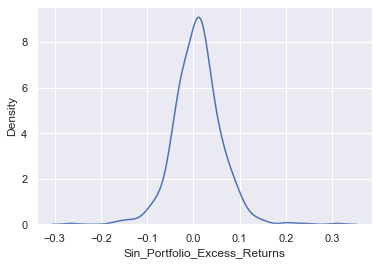

In [27]:
import seaborn as sns
sns.set(rc = {"figure.figsize": (16,16)})
fig1 = sns.kdeplot(sin_model_df2["Sin_Portfolio_Excess_Returns"])



<AxesSubplot:title={'center':'Sin Portfolio Excess Returns with US Recession Indicator'}>

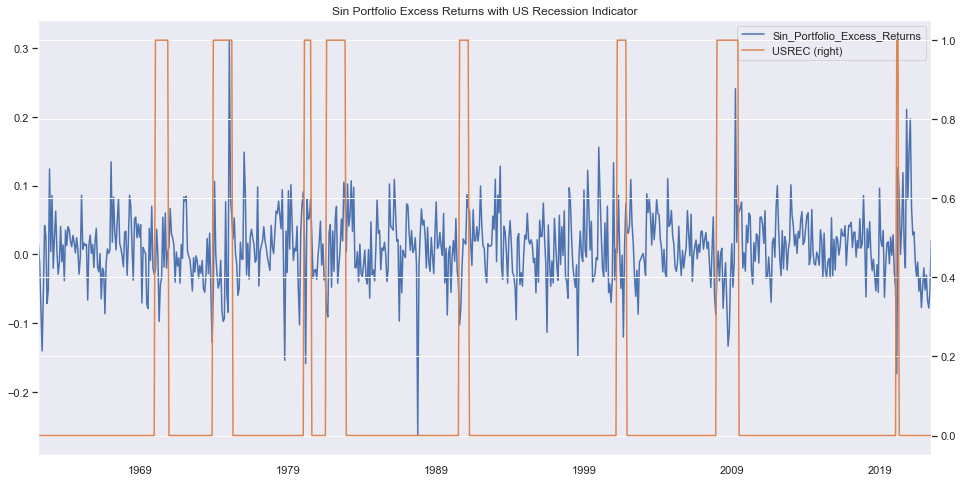

In [28]:
sin_model_df2[["Sin_Portfolio_Excess_Returns", "USREC"]].plot(secondary_y = ["USREC"], figsize = (16,8), title = "Sin Portfolio Excess Returns with US Recession Indicator")

In [63]:
sin_model_df_plot = sin_model_df2.copy()
sin_model_df_plot.reset_index(inplace=True)

In [64]:
sin_model_df_plot["Sin_Portfolio_Excess_Returns"].describe()

count    726.000000
mean       0.009027
std        0.051466
min       -0.263608
25%       -0.021703
50%        0.009003
75%        0.036501
max        0.311627
Name: Sin_Portfolio_Excess_Returns, dtype: float64

In [65]:
sin_model_df_plot["USREC1"] = sin_model_df_plot["USREC"].replace(1, -1)

c:\Users\user\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1435: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim(0, None)


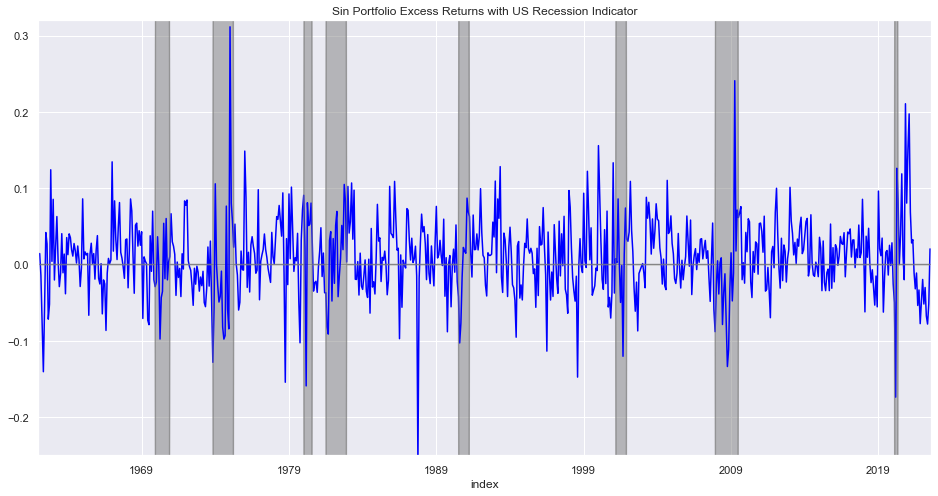

In [76]:
# create plot
fig, ax = plt.subplots()
sin_model_df_plot.plot.line(ax=ax, figsize=(8, 5), x= "index", y = "Sin_Portfolio_Excess_Returns", color="blue")
sin_model_df_plot.plot.area(ax=ax, figsize=(8, 5), x= "index", y = "USREC1", alpha=0.5, color="gray")
sin_model_df_plot.plot.area(ax=ax, figsize=(8, 5), x= "index", y = "USREC", alpha=0.5, color="gray")

plt.xlim("1962-01-01", "2022-08-01")
plt.ylim(-0.25, 0.32)
fig.set_size_inches(16,8)
ax.get_legend().remove()
ax.title.set_text("Sin Portfolio Excess Returns with US Recession Indicator")

## Sin Regressions

In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
X = sin_model_df2[["ExRm", "SMB", "HML", "MOM"]]
y = sin_model_df2["Sin_Portfolio_Excess_Returns"]

X = sm.add_constant(X)

model = sm.OLS(y, X)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Sin_Portfolio_Excess_Returns   R-squared:                       0.594
Model:                                      OLS   Adj. R-squared:                  0.592
Method:                           Least Squares   F-statistic:                     264.0
Date:                          Sun, 25 Sep 2022   Prob (F-statistic):          1.28e-139
Time:                                  20:34:42   Log-Likelihood:                 1451.7
No. Observations:                           726   AIC:                            -2893.
Df Residuals:                               721   BIC:                            -2870.
Df Model:                                     4                                         
Covariance Type:                      nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0046      0.001      3.617      0.000       0.002       0.007
ExRm           0.6746      0.030     22.763      0.000       0.616       0.733
SMB            0.5756      0.043     13.533      0.000       0.492       0.659
HML            0.1712      0.044      3.870      0.000       0.084       0.258
MOM           -0.1307      0.031     -4.252      0.000      -0.191      -0.070
==============================================================================
Omnibus:                       37.982   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.625
Skew:                           0.373   Prob(JB):                     3.41e-15
Kurtosis:                       4.283   Cond. No.                         38.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
import statsmodels.formula.api as smf
formula_3 = "Sin_Portfolio_Excess_Returns ~ ExRm + SMB + HML + MOM + USREC + USREC * ExRm + USREC * SMB + USREC * HML + USREC * MOM"

interaction_model = smf.ols(formula = formula_3, data = sin_model_df2)
result2 = interaction_model.fit()
result2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Sin_Portfolio_Excess_Returns   R-squared:                       0.598
Model:                                      OLS   Adj. R-squared:                  0.593
Method:                           Least Squares   F-statistic:                     118.6
Date:                          Sun, 25 Sep 2022   Prob (F-statistic):          1.72e-135
Time:                                  20:34:42   Log-Likelihood:                 1455.5
No. Observations:                           726   AIC:                            -2891.
Df Residuals:                               716   BIC:                            -2845.
Df Model:                                     9                                         
Covariance Type:                      nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0052      0.001      3.807      0.000       0.003       0.008
ExRm           0.6486      0.034     18.934      0.000       0.581       0.716
SMB            0.5475      0.046     11.850      0.000       0.457       0.638
HML            0.1503      0.051      2.975      0.003       0.051       0.249
MOM           -0.1409      0.036     -3.897      0.000      -0.212      -0.070
USREC         -0.0027      0.004     -0.712      0.477      -0.010       0.005
USREC:ExRm     0.0995      0.072      1.380      0.168      -0.042       0.241
USREC:SMB      0.2285      0.124      1.844      0.066      -0.015       0.472
USREC:HML      0.0636      0.105      0.608      0.543      -0.142       0.269
USREC:MOM      0.1072      0.075      1.433      0.152      -0.040       0.254
==============================================================================
Omnibus:                       39.905   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.944
Skew:                           0.386   Prob(JB):                     3.93e-16
Kurtosis:                       4.322   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Stim Portfolio

In [31]:
stim_pivot = pd.read_csv("stim_pivot.csv")
# stim_stocks = pd.read_csv("stim_stocks.csv")

In [32]:
stim_pivot["datadate"] = pd.to_datetime(stim_pivot["datadate"])
stim_pivot.set_index("datadate",inplace=True)

In [33]:
stim_pivot.head()

,3PLFF,BGMTQ,BKCT,BRCC,CHF.,CTEA,FARM,FHAI,GMCR,HCEI,...,NUZE,PEET,PLAG,RVACU,SBEAU,SWP.,SWSSF,UOLI,WEST,WFGCF
datadate,,,,,,,,,,,,,,,,,,,,,
1965-12-31,NaN,NaN,NaN,NaN,-0.002174,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966-01-31,NaN,NaN,NaN,NaN,0.021978,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966-02-28,NaN,NaN,NaN,NaN,-0.021505,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966-03-31,NaN,NaN,NaN,NaN,-0.057143,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966-04-30,NaN,NaN,NaN,NaN,0.023530,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
len(stim_pivot.columns)

25

In [35]:
stim_portfolio = stim_pivot.copy()
stim_portfolio["Num_Active_Stocks"] = len(stim_pivot.columns) - stim_portfolio.isnull().sum(axis = 1)
stim_portfolio["Portfolio_Proportion"] = 1/stim_portfolio["Num_Active_Stocks"]

stim_portfolio_returns = stim_portfolio.mul(stim_portfolio["Portfolio_Proportion"], axis = 0)
stim_portfolio_returns.drop(columns = ["Num_Active_Stocks", "Portfolio_Proportion"], inplace = True)
stim_portfolio_returns["Portfolio_Returns"] = stim_portfolio_returns.sum(axis = 1)
stim_portfolio_returns["Portfolio_Proportion"] = stim_portfolio["Portfolio_Proportion"]
stim_portfolio_merged = pd.concat([stim_portfolio[["Num_Active_Stocks"]], stim_portfolio_returns], axis = 1, join = "inner")


In [36]:
moved_cols = ["Portfolio_Returns", "Portfolio_Proportion"]

stim_portfolio_merged = stim_portfolio_merged[moved_cols + [col for col in stim_portfolio_merged.columns if col not in moved_cols]]
stim_portfolio_merged.head()

,Portfolio_Returns,Portfolio_Proportion,Num_Active_Stocks,3PLFF,BGMTQ,BKCT,BRCC,CHF.,CTEA,FARM,...,NUZE,PEET,PLAG,RVACU,SBEAU,SWP.,SWSSF,UOLI,WEST,WFGCF
datadate,,,,,,,,,,,,,,,,,,,,,
1965-12-31,-0.002174,1.0,1,NaN,NaN,NaN,NaN,-0.002174,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966-01-31,0.021978,1.0,1,NaN,NaN,NaN,NaN,0.021978,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966-02-28,-0.021505,1.0,1,NaN,NaN,NaN,NaN,-0.021505,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966-03-31,-0.057143,1.0,1,NaN,NaN,NaN,NaN,-0.057143,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966-04-30,0.023530,1.0,1,NaN,NaN,NaN,NaN,0.023530,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Merging Stim, FAMA, and Recession

In [37]:
from pandas.tseries.offsets import MonthEnd

stim_pivot.index = stim_pivot.index + MonthEnd(0)
stim_pivot

,3PLFF,BGMTQ,BKCT,BRCC,CHF.,CTEA,FARM,FHAI,GMCR,HCEI,...,NUZE,PEET,PLAG,RVACU,SBEAU,SWP.,SWSSF,UOLI,WEST,WFGCF
datadate,,,,,,,,,,,,,,,,,,,,,
1965-12-31,NaN,NaN,NaN,NaN,-0.002174,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966-01-31,NaN,NaN,NaN,NaN,0.021978,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966-02-28,NaN,NaN,NaN,NaN,-0.021505,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966-03-31,NaN,NaN,NaN,NaN,-0.057143,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966-04-30,NaN,NaN,NaN,NaN,0.023530,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,NaN,NaN,NaN,-0.286057,NaN,NaN,-0.117978,0.137931,NaN,NaN,...,-0.273973,NaN,-0.130726,0.045000,NaN,-0.106109,-0.082771,0.166667,0.014366,NaN
2022-05-31,NaN,NaN,NaN,-0.334228,NaN,NaN,-0.203822,-0.075758,NaN,-0.99,...,-0.132075,NaN,0.203333,-0.003847,NaN,-0.032374,-0.129744,-0.028571,-0.002066,-0.995838
2022-06-30,NaN,NaN,NaN,-0.177419,NaN,NaN,-0.062000,0.000000,NaN,NaN,...,-0.268116,NaN,-0.158214,0.008665,NaN,-0.081784,-0.010728,-0.019608,0.002525,0.000000


In [38]:
stim_returns = stim_portfolio_merged[["Portfolio_Returns"]]
stim_returns

,Portfolio_Returns
datadate,
1965-12-31,-0.002174
1966-01-31,0.021978
1966-02-28,-0.021505
1966-03-31,-0.057143
1966-04-30,0.023530
...,...
2022-04-30,-0.079998
2022-05-31,-0.197442
2022-06-30,-0.057121


In [39]:
stim_model_df = pd.concat([stim_returns, fama_df], axis = 1, join = "inner")
stim_model_df

,Portfolio_Returns,mktrf,smb,hml,rf,umd
1965-12-31,-0.002174,0.0101,0.0206,0.0203,0.0033,0.0012
1966-01-31,0.021978,0.0072,0.0384,0.0356,0.0038,0.0539
1966-02-28,-0.021505,-0.0121,0.0440,0.0033,0.0035,0.0457
1966-03-31,-0.057143,-0.0251,0.0099,-0.0198,0.0038,0.0142
1966-04-30,0.023530,0.0214,0.0343,-0.0046,0.0034,0.0628
...,...,...,...,...,...,...
2022-03-31,0.062881,0.0305,-0.0160,-0.0180,0.0001,0.0300
2022-04-30,-0.079998,-0.0946,-0.0141,0.0619,0.0001,0.0489
2022-05-31,-0.197442,-0.0034,-0.0185,0.0841,0.0003,0.0248
2022-06-30,-0.057121,-0.0843,0.0209,-0.0597,0.0006,0.0079


In [40]:
stim_model_df["Portfolio_Excess_Returns"] = stim_model_df["Portfolio_Returns"] - stim_model_df["rf"]
stim_model_df

,Portfolio_Returns,mktrf,smb,hml,rf,umd,Portfolio_Excess_Returns
1965-12-31,-0.002174,0.0101,0.0206,0.0203,0.0033,0.0012,-0.005474
1966-01-31,0.021978,0.0072,0.0384,0.0356,0.0038,0.0539,0.018178
1966-02-28,-0.021505,-0.0121,0.0440,0.0033,0.0035,0.0457,-0.025005
1966-03-31,-0.057143,-0.0251,0.0099,-0.0198,0.0038,0.0142,-0.060943
1966-04-30,0.023530,0.0214,0.0343,-0.0046,0.0034,0.0628,0.020130
...,...,...,...,...,...,...,...
2022-03-31,0.062881,0.0305,-0.0160,-0.0180,0.0001,0.0300,0.062781
2022-04-30,-0.079998,-0.0946,-0.0141,0.0619,0.0001,0.0489,-0.080098
2022-05-31,-0.197442,-0.0034,-0.0185,0.0841,0.0003,0.0248,-0.197742
2022-06-30,-0.057121,-0.0843,0.0209,-0.0597,0.0006,0.0079,-0.057721


In [41]:
stim_model_df.rename(columns = {"mktrf": "ExRm", "smb": "SMB", "hml": "HML", "umd": "MOM"}, inplace=True)

In [42]:
stim_model_df2 = pd.concat([stim_model_df, recession], axis = 1, join = "inner")
stim_model_df2

,Portfolio_Returns,ExRm,SMB,HML,rf,MOM,Portfolio_Excess_Returns,USREC
1965-12-31,-0.002174,0.0101,0.0206,0.0203,0.0033,0.0012,-0.005474,0
1966-01-31,0.021978,0.0072,0.0384,0.0356,0.0038,0.0539,0.018178,0
1966-02-28,-0.021505,-0.0121,0.0440,0.0033,0.0035,0.0457,-0.025005,0
1966-03-31,-0.057143,-0.0251,0.0099,-0.0198,0.0038,0.0142,-0.060943,0
1966-04-30,0.023530,0.0214,0.0343,-0.0046,0.0034,0.0628,0.020130,0
...,...,...,...,...,...,...,...,...
2022-03-31,0.062881,0.0305,-0.0160,-0.0180,0.0001,0.0300,0.062781,0
2022-04-30,-0.079998,-0.0946,-0.0141,0.0619,0.0001,0.0489,-0.080098,0
2022-05-31,-0.197442,-0.0034,-0.0185,0.0841,0.0003,0.0248,-0.197742,0
2022-06-30,-0.057121,-0.0843,0.0209,-0.0597,0.0006,0.0079,-0.057721,0


In [43]:
stim_model_df2.rename(columns = {"Portfolio_Excess_Returns": "Stim_Portfolio_Excess_Returns"}, inplace=True)

In [44]:
stim_model_df2["Stim_Portfolio_Excess_Returns"].describe()

count    680.000000
mean       0.009926
std        0.111108
min       -0.342978
25%       -0.056441
50%       -0.005629
75%        0.062024
max        0.695662
Name: Stim_Portfolio_Excess_Returns, dtype: float64

## Plots for Stim Portfolio

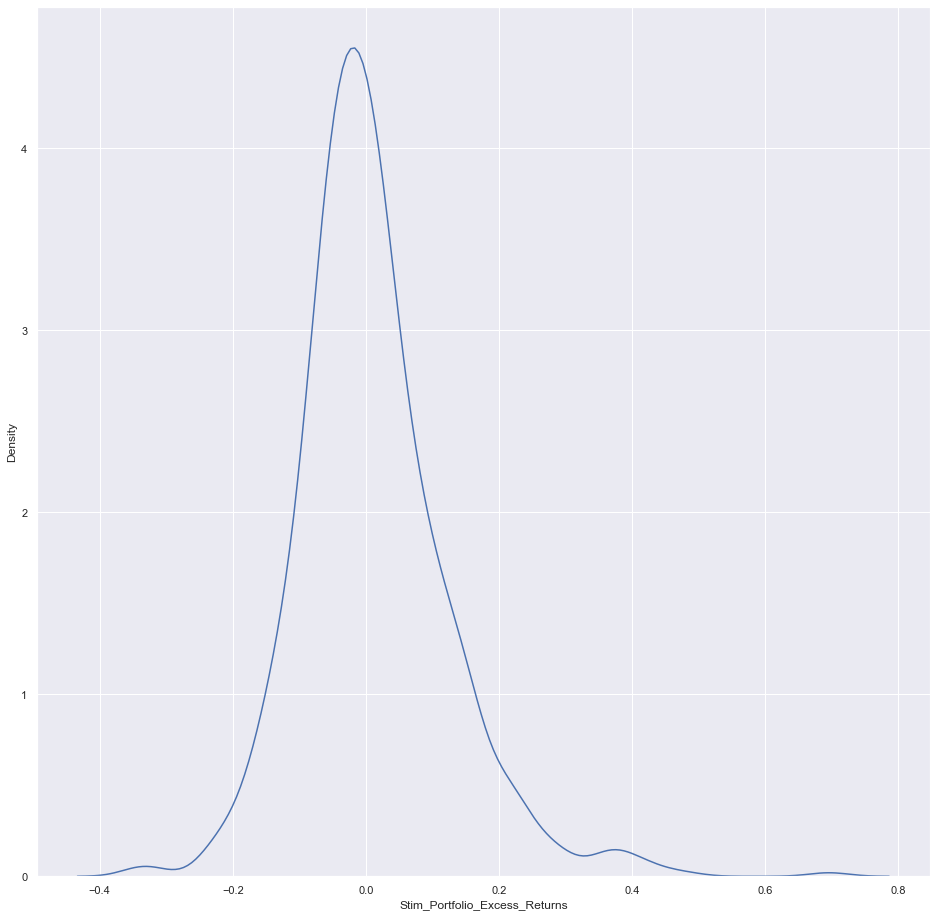

In [45]:
import seaborn as sns
sns.set(rc = {"figure.figsize": (16,16)})
fig1 = sns.kdeplot(stim_model_df2["Stim_Portfolio_Excess_Returns"])



<AxesSubplot:title={'center':'Stim Portfolio Excess Returns with US Recession Indicator'}>

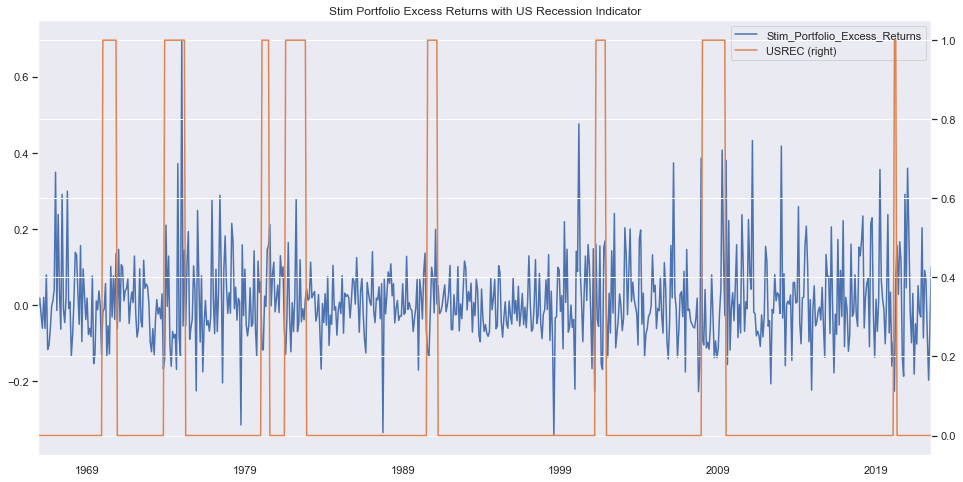

In [46]:
stim_model_df2[["Stim_Portfolio_Excess_Returns", "USREC"]].plot(secondary_y = ["USREC"], figsize = (16,8), title = "Stim Portfolio Excess Returns with US Recession Indicator")

## Stim Regressions

In [47]:
X = stim_model_df2[["ExRm", "SMB", "HML", "MOM"]]
y = stim_model_df2["Stim_Portfolio_Excess_Returns"]

X = sm.add_constant(X)

model = sm.OLS(y, X)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Stim_Portfolio_Excess_Returns   R-squared:                       0.220
Model:                                       OLS   Adj. R-squared:                  0.215
Method:                            Least Squares   F-statistic:                     47.52
Date:                           Sun, 25 Sep 2022   Prob (F-statistic):           3.24e-35
Time:                                   20:34:44   Log-Likelihood:                 614.11
No. Observations:                            680   AIC:                            -1218.
Df Residuals:                                675   BIC:                            -1196.
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0026      0.004      0.657      0.512      -0.005       0.010
ExRm           0.9425      0.090     10.421      0.000       0.765       1.120
SMB            0.6262      0.129      4.857      0.000       0.373       0.879
HML            0.6097      0.134      4.555      0.000       0.347       0.873
MOM           -0.1169      0.093     -1.257      0.209      -0.299       0.066
==============================================================================
Omnibus:                      117.057   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.245
Skew:                           0.906   Prob(JB):                     5.14e-62
Kurtosis:                       5.584   Cond. No.                         37.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
formula_3 = "Stim_Portfolio_Excess_Returns ~ ExRm + SMB + HML + MOM + USREC + USREC * ExRm + USREC * SMB + USREC * HML + USREC * MOM"

interaction_model = smf.ols(formula = formula_3, data = stim_model_df2)
result2 = interaction_model.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Stim_Portfolio_Excess_Returns   R-squared:                       0.238
Model:                                       OLS   Adj. R-squared:                  0.228
Method:                            Least Squares   F-statistic:                     23.26
Date:                           Sun, 25 Sep 2022   Prob (F-statistic):           1.14e-34
Time:                                   20:34:44   Log-Likelihood:                 622.20
No. Observations:                            680   AIC:                            -1224.
Df Residuals:                                670   BIC:                            -1179.
Df Model:                                      9                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0011      0.004      0.266      0.790      -0.007       0.009
ExRm           0.8679      0.105      8.291      0.000       0.662       1.073
SMB            0.5404      0.139      3.875      0.000       0.267       0.814
HML            0.7120      0.152      4.672      0.000       0.413       1.011
MOM            0.0922      0.109      0.845      0.399      -0.122       0.306
USREC          0.0053      0.012      0.459      0.646      -0.017       0.028
USREC:ExRm     0.1319      0.216      0.611      0.541      -0.292       0.556
USREC:SMB      0.3204      0.369      0.867      0.386      -0.405       1.046
USREC:HML     -0.4894      0.312     -1.566      0.118      -1.103       0.124
USREC:MOM     -0.5986      0.223     -2.680      0.008      -1.037      -0.160
==============================================================================
Omnibus:                      109.741   Durbin-Watson:                   2.168
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.335
Skew:                           0.865   Prob(JB):                     2.18e-56
Kurtosis:                       5.461   Cond. No.                         103.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Stationarity Tests

## Sin Portfolio

In [77]:
sin_model_df2.head()

,Portfolio_Returns,ExRm,SMB,HML,rf,MOM,Sin_Portfolio_Excess_Returns,USREC
1962-02-28,0.016444,0.0181,-0.0115,0.0082,0.0020,-0.0101,0.014444,0
1962-03-31,-0.011945,-0.0068,0.0052,-0.0138,0.0020,0.0184,-0.013945,0
1962-04-30,-0.073594,-0.0659,-0.0070,0.0003,0.0022,0.0291,-0.075794,0
1962-05-31,-0.138066,-0.0865,-0.0334,0.0277,0.0024,0.0041,-0.140466,0
1962-06-30,-0.052827,-0.0847,-0.0059,0.0255,0.0020,0.0646,-0.054827,0


In [87]:
from statsmodels.tsa.stattools import adfuller

adf_dict = {}

for col in sin_model_df2.columns:
    if col == "Portfolio_Returns" or col == "rf" or col == "USREC":
        continue
    else:
        temp_adf = adfuller(sin_model_df2[col])
        if temp_adf[0] <= temp_adf[4]["1%"]:
            adf_dict[col] = [str(round(temp_adf[0],3)) + "***", str(round(temp_adf[1],3))]
            
        elif temp_adf[0] <= temp_adf[4]["5%"]:
            adf_dict[col] = [str(round(temp_adf[0],3)) + "**", str(round(temp_adf[1],3))]

        elif temp_adf[0] <= temp_adf[4]["10%"]:
            adf_dict[col] = [str(round(temp_adf[0],3)) + "*", str(round(temp_adf[1],3))]
        else:
            adf_dict[col] = [str(round(temp_adf[0],3)), str(round(temp_adf[1],3))]

adf_dict

{'ExRm': ['-25.357***', '0.0'],
 'SMB': ['-15.785***', '0.0'],
 'HML': ['-22.514***', '0.0'],
 'MOM': ['-19.714***', '0.0'],
 'Sin_Portfolio_Excess_Returns': ['-7.879***', '0.0']}

In [93]:
stim_adf = adfuller(stim_model_df2["Stim_Portfolio_Excess_Returns"])

adf_dict["Stim_Portfolio_Excess_Returns"] = [str(round(stim_adf[0],3)) + "***", str(round(stim_adf[1],3))]

adf_dict

{'ExRm': ['-25.357***', '0.0'],
 'SMB': ['-15.785***', '0.0'],
 'HML': ['-22.514***', '0.0'],
 'MOM': ['-19.714***', '0.0'],
 'Sin_Portfolio_Excess_Returns': ['-7.879***', '0.0'],
 'Stim_Portfolio_Excess_Returns': ['-26.712***', '0.0']}

In [98]:
adf_df = pd.DataFrame(adf_dict)
adf_df

,ExRm,SMB,HML,MOM,Sin_Portfolio_Excess_Returns,Stim_Portfolio_Excess_Returns
0,-25.357***,-15.785***,-22.514***,-19.714***,-7.879***,-26.712***
1,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
adf_df = adf_df.T
adf_df.reset_index(inplace=True)
adf_df.columns = ["Series", "ADF_Test_Statistic", "MacKinnon_p_value"]

In [104]:
adf_df

,Series,ADF_Test_Statistic,MacKinnon_p_value
0,ExRm,-25.357***,0.0
1,SMB,-15.785***,0.0
2,HML,-22.514***,0.0
3,MOM,-19.714***,0.0
4,Sin_Portfolio_Excess_Returns,-7.879***,0.0
5,Stim_Portfolio_Excess_Returns,-26.712***,0.0


In [101]:
adf_df.to_csv("ADF_Test_Results.csv")

# MISC PLOTS

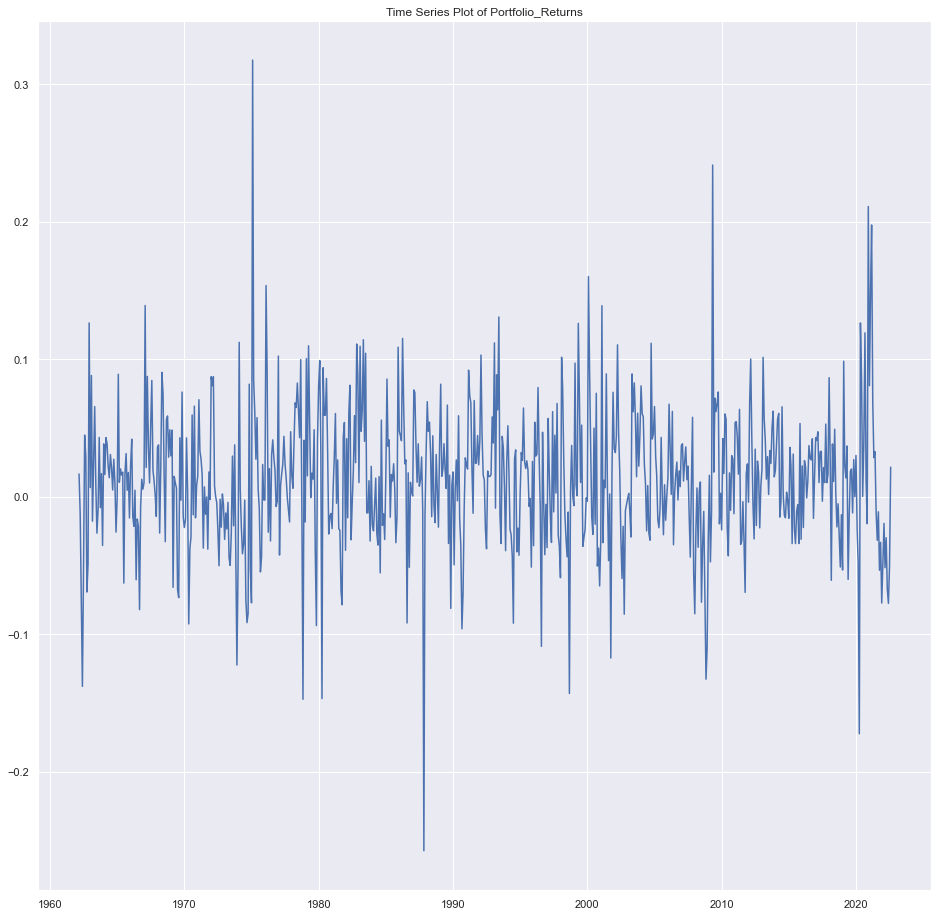

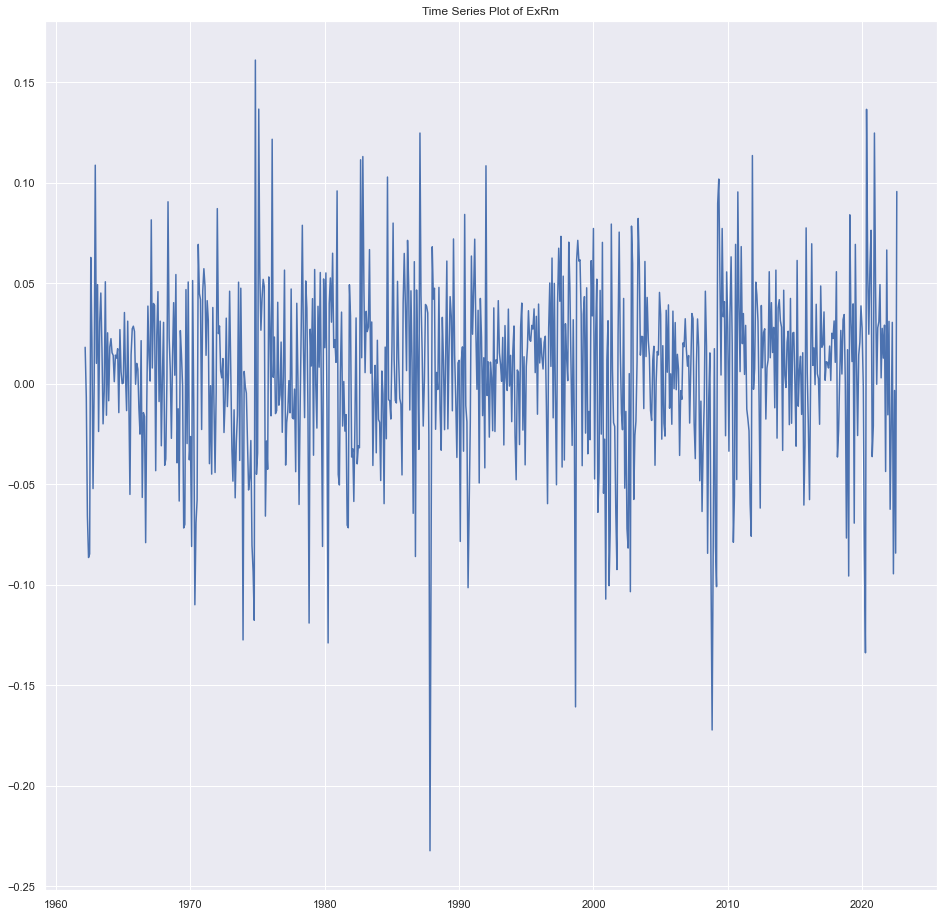

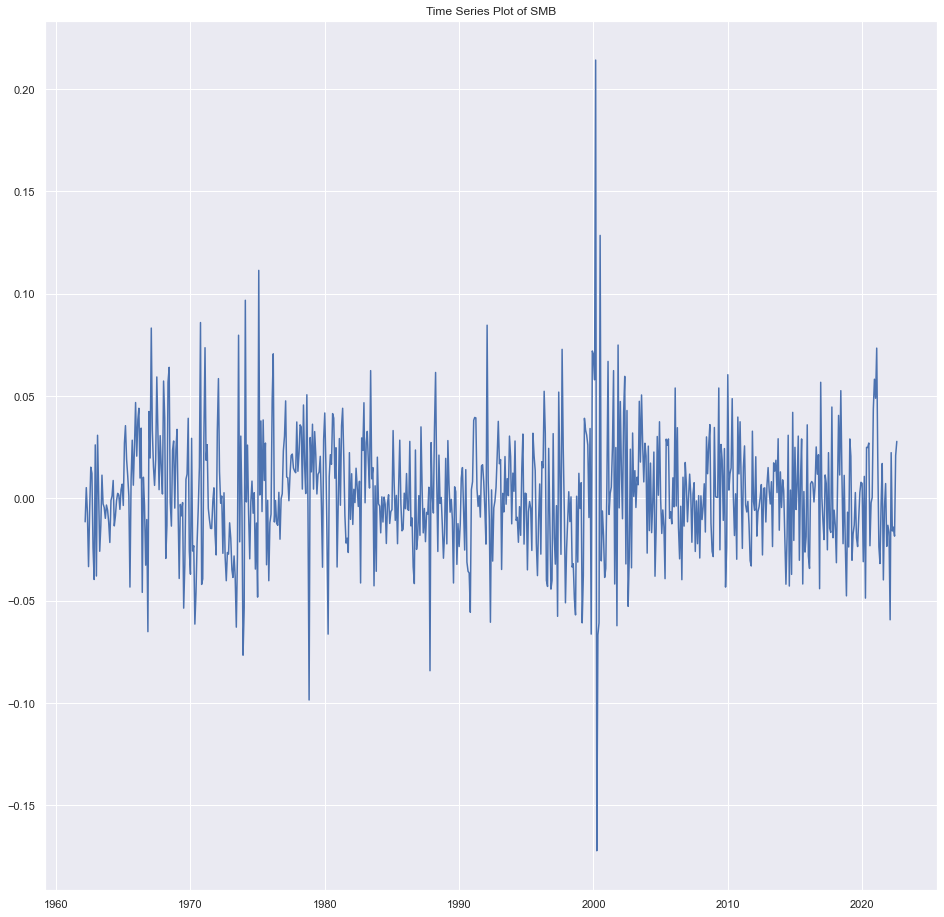

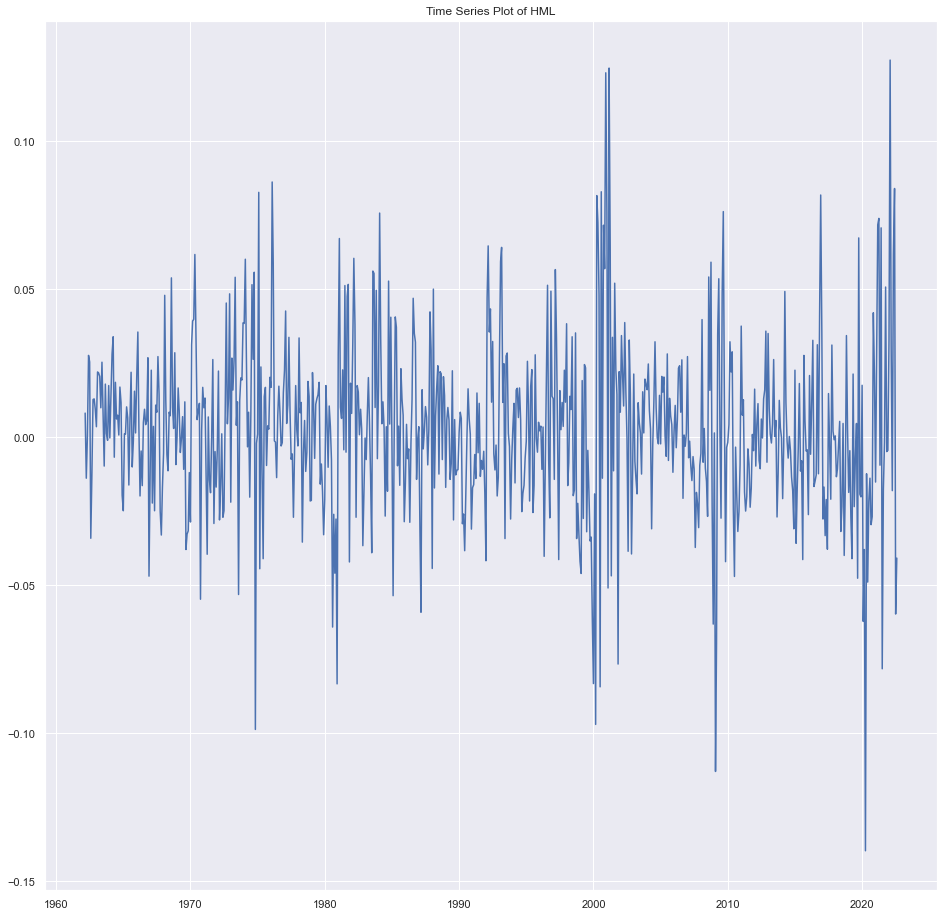

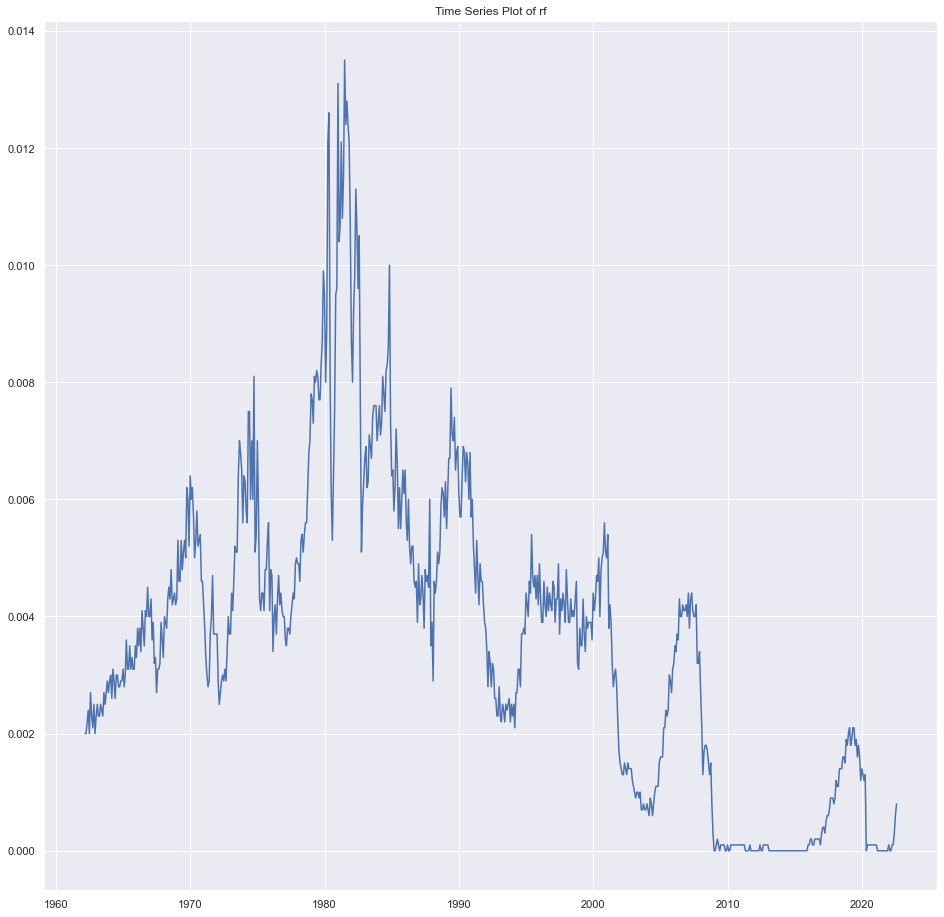

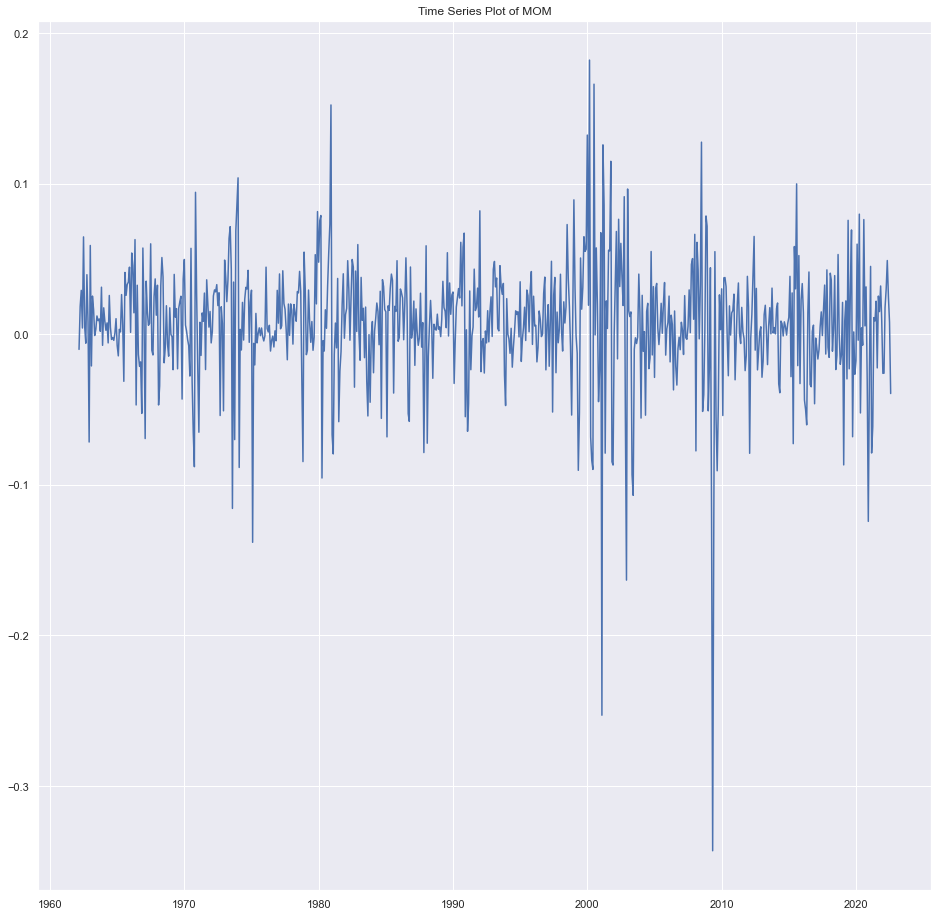

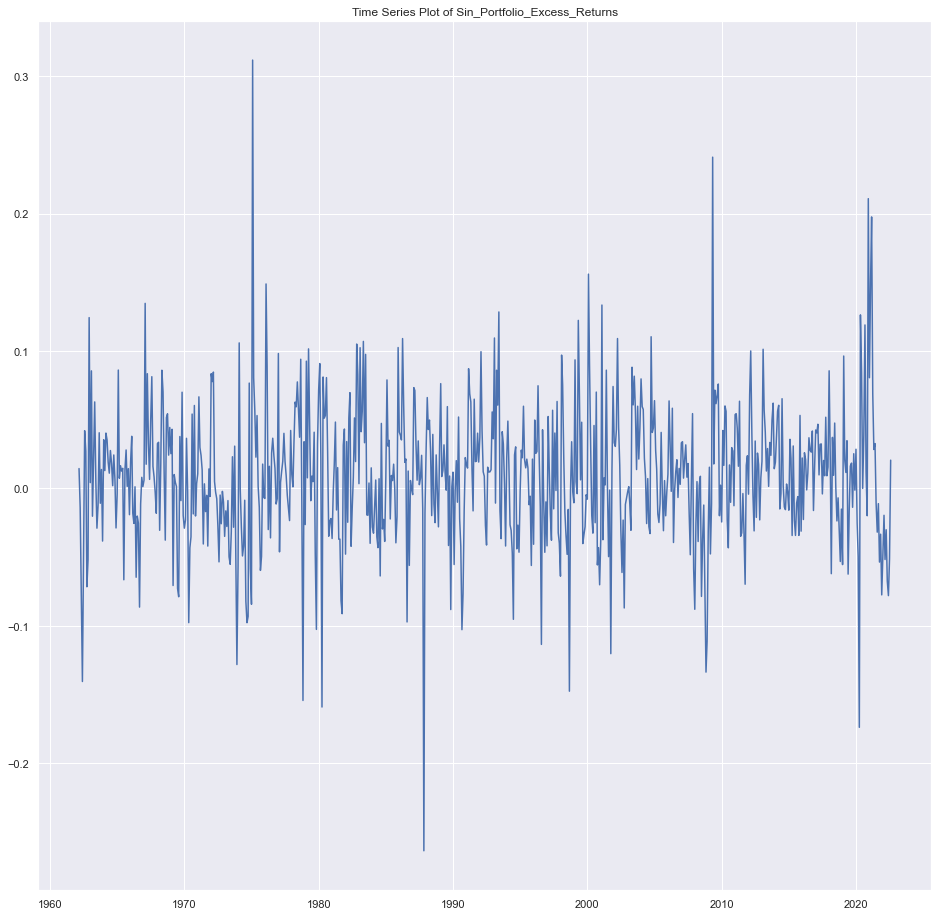

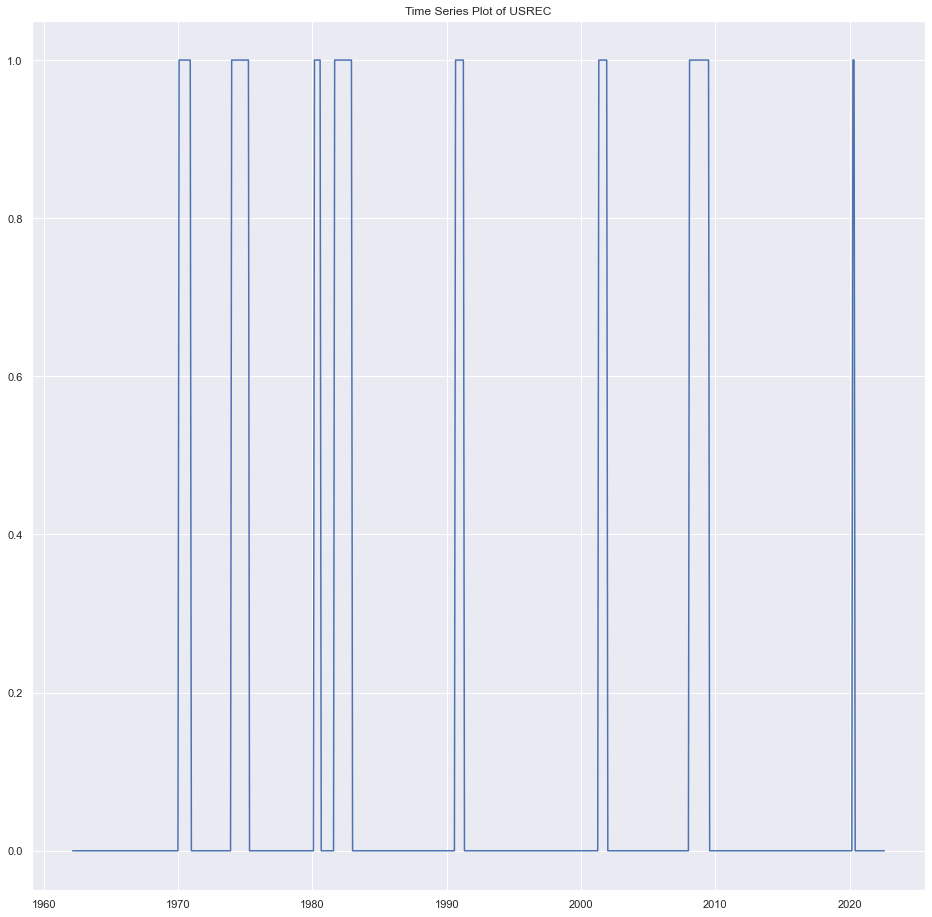

In [49]:
for col in sin_model_df2:
    plt.plot(sin_model_df2[col].index, sin_model_df2[col])
    plt.title(f"Time Series Plot of {col}")
    plt.show()

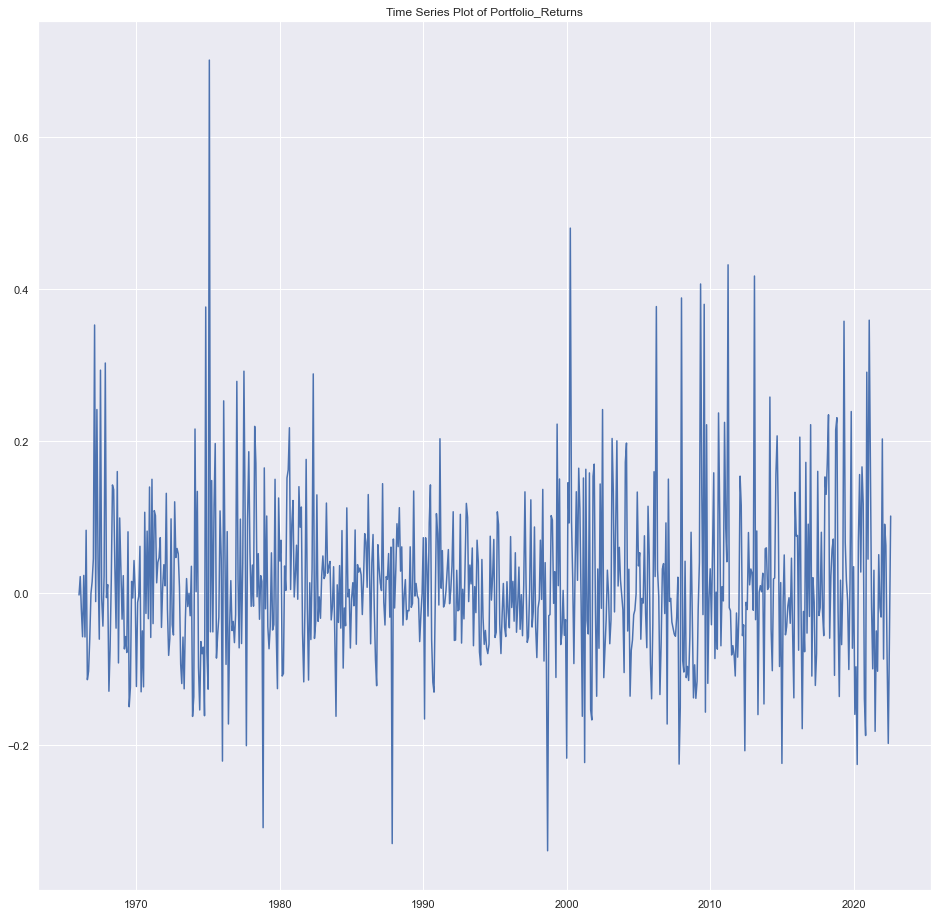

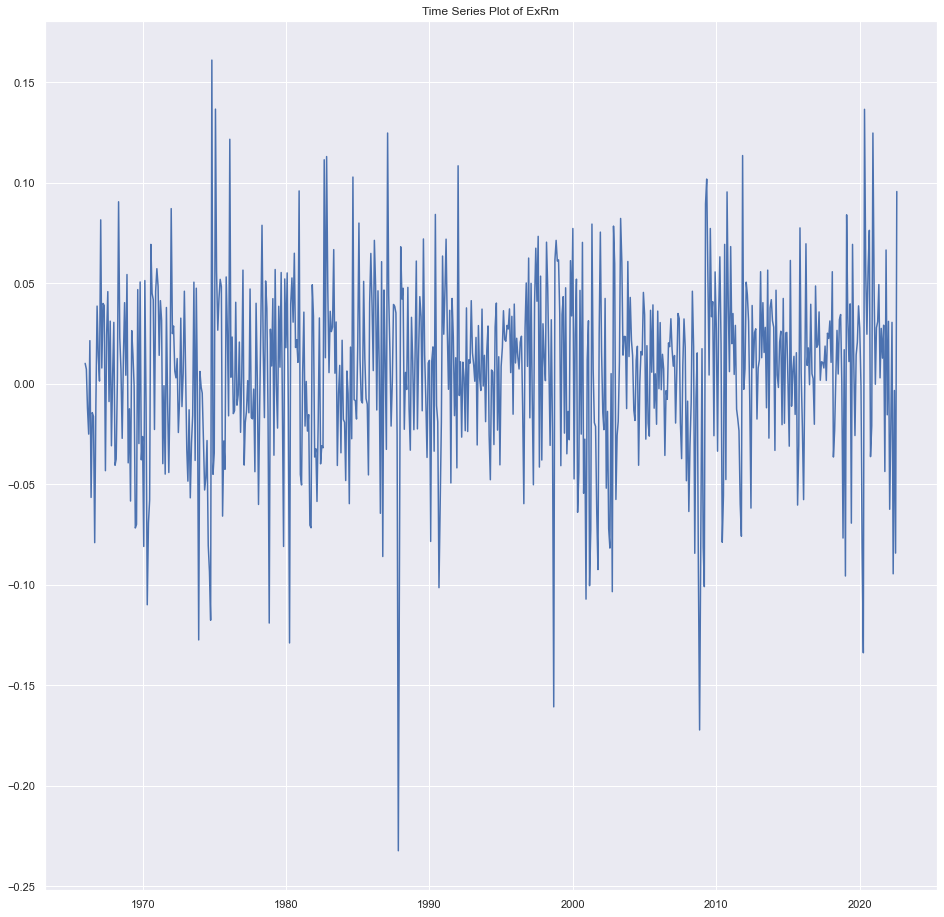

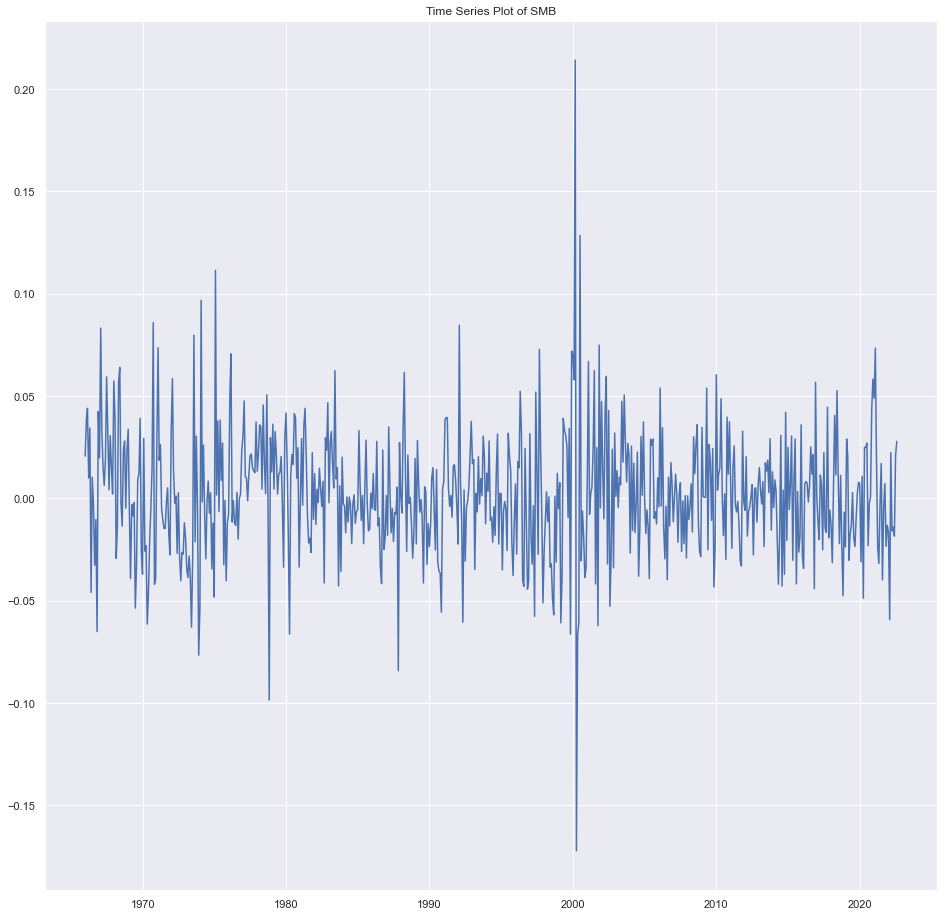

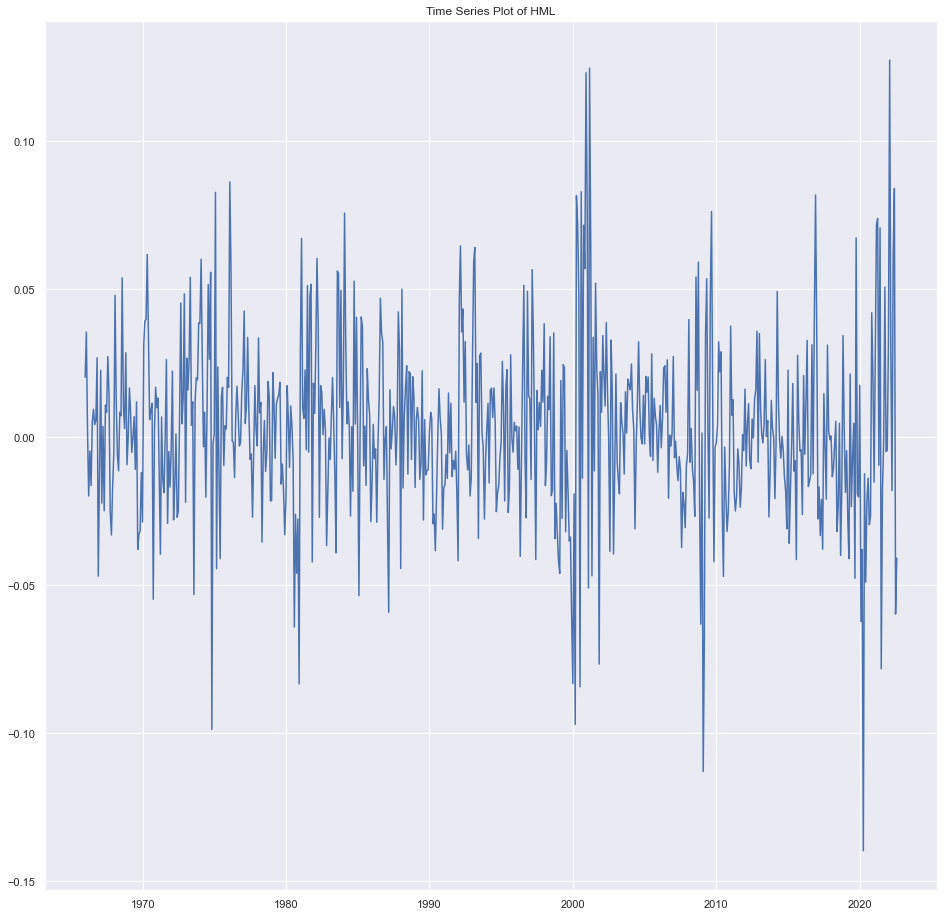

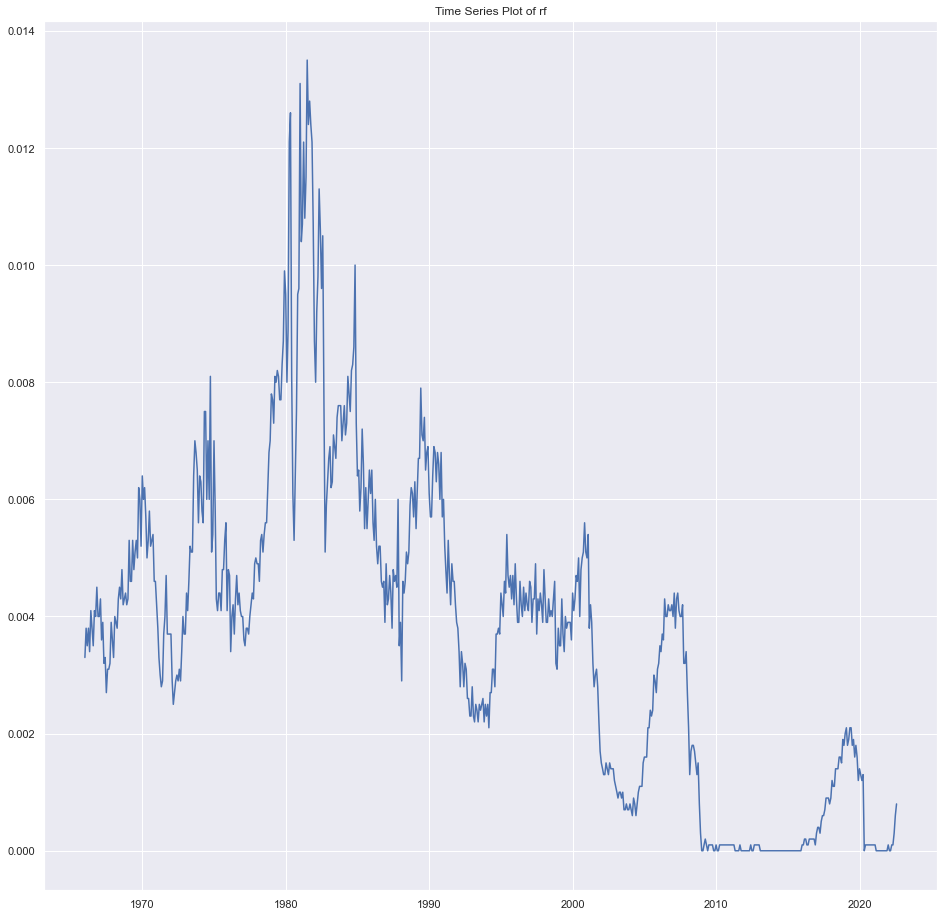

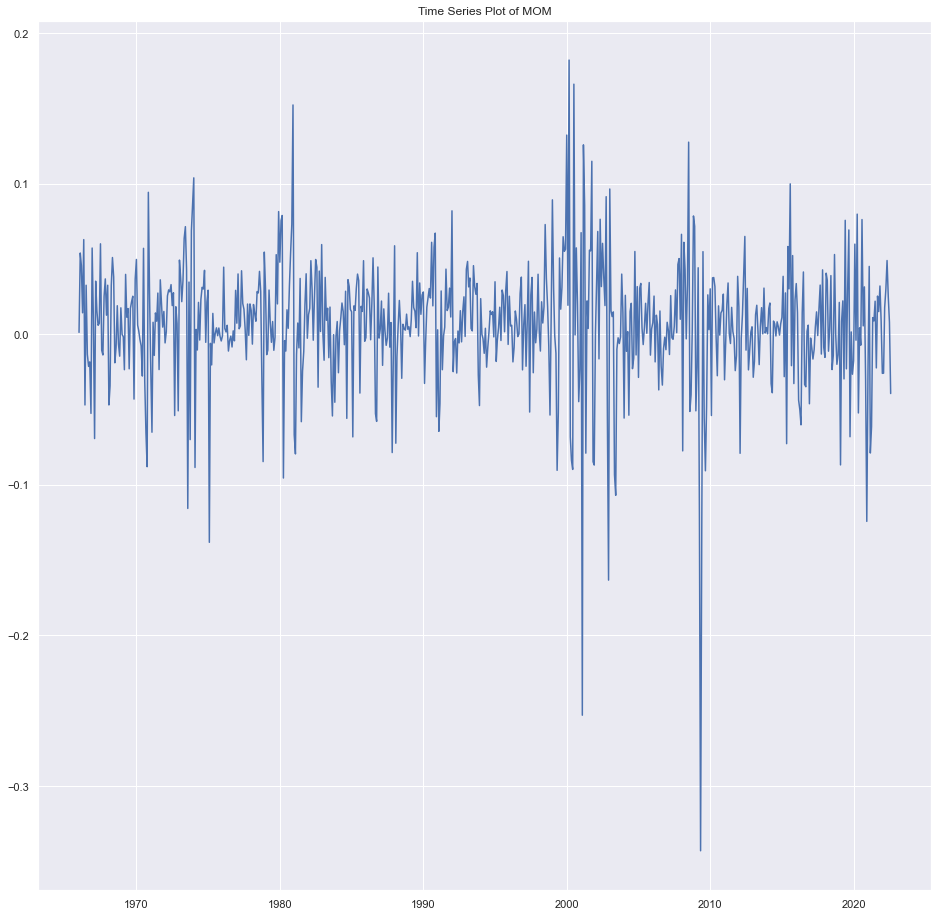

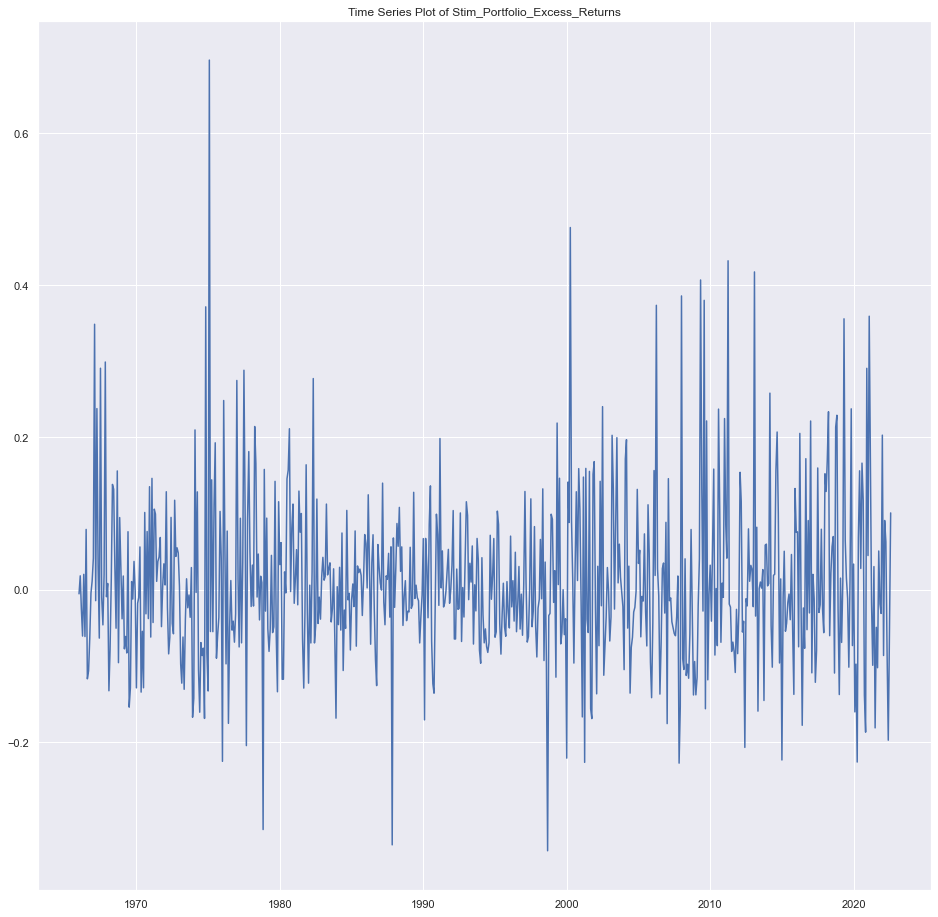

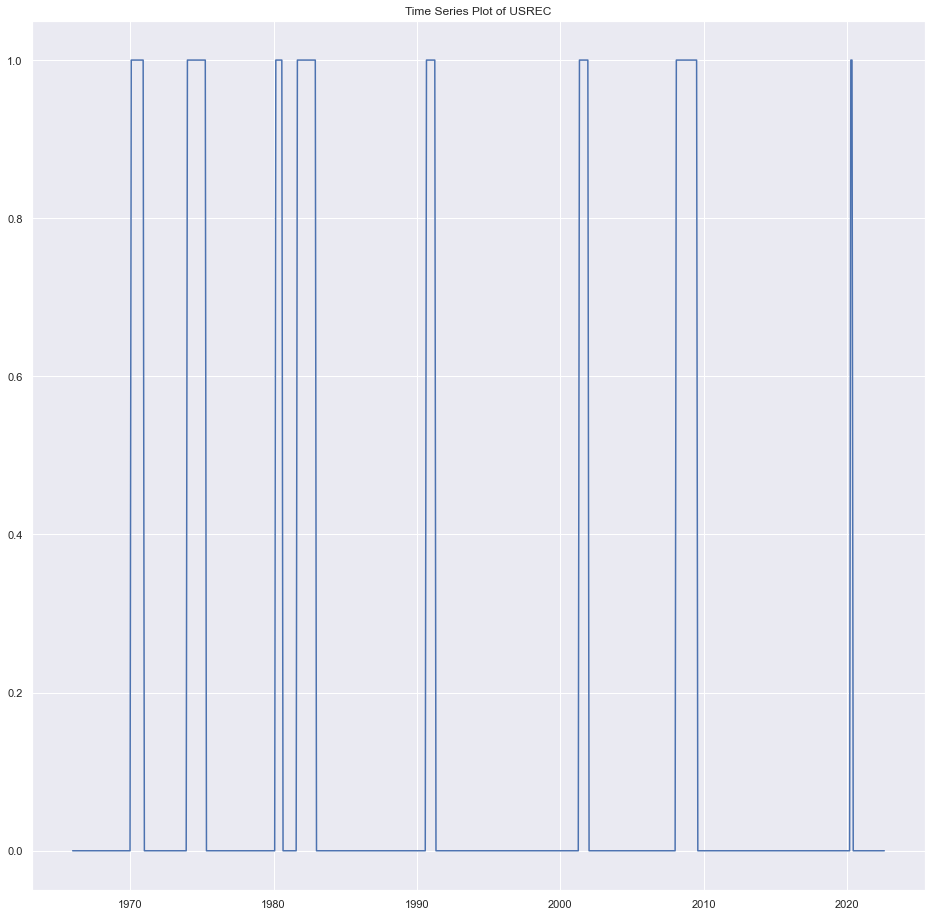

In [50]:
for col in stim_model_df2:
    plt.plot(stim_model_df2[col].index, stim_model_df2[col])
    plt.title(f"Time Series Plot of {col}")
    plt.show()